<a href="https://colab.research.google.com/github/nikeshgamal24/Medical-Insurance-Prediction-Project/blob/main/Medical_Insurance_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
## necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [74]:
data = pd.read_csv("medical_insurance.csv")

In [75]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
## check for null values
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [77]:
## check for the duplicated records
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2767,True
2768,True
2769,True
2770,True


In [78]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [79]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [81]:
for col in data.columns:
  print(f"Column Name: {col}")
  print(f"Unique Values: {len(data[col].unique())}")
  print("--------------------------")

Column Name: age
Unique Values: 47
--------------------------
Column Name: sex
Unique Values: 2
--------------------------
Column Name: bmi
Unique Values: 548
--------------------------
Column Name: children
Unique Values: 6
--------------------------
Column Name: smoker
Unique Values: 2
--------------------------
Column Name: region
Unique Values: 4
--------------------------
Column Name: charges
Unique Values: 1337
--------------------------


In [82]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [83]:
data.shape

(2772, 7)

In [84]:
data.drop_duplicates(keep="first",inplace=True)

In [85]:
data.shape

(1337, 7)

In [86]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


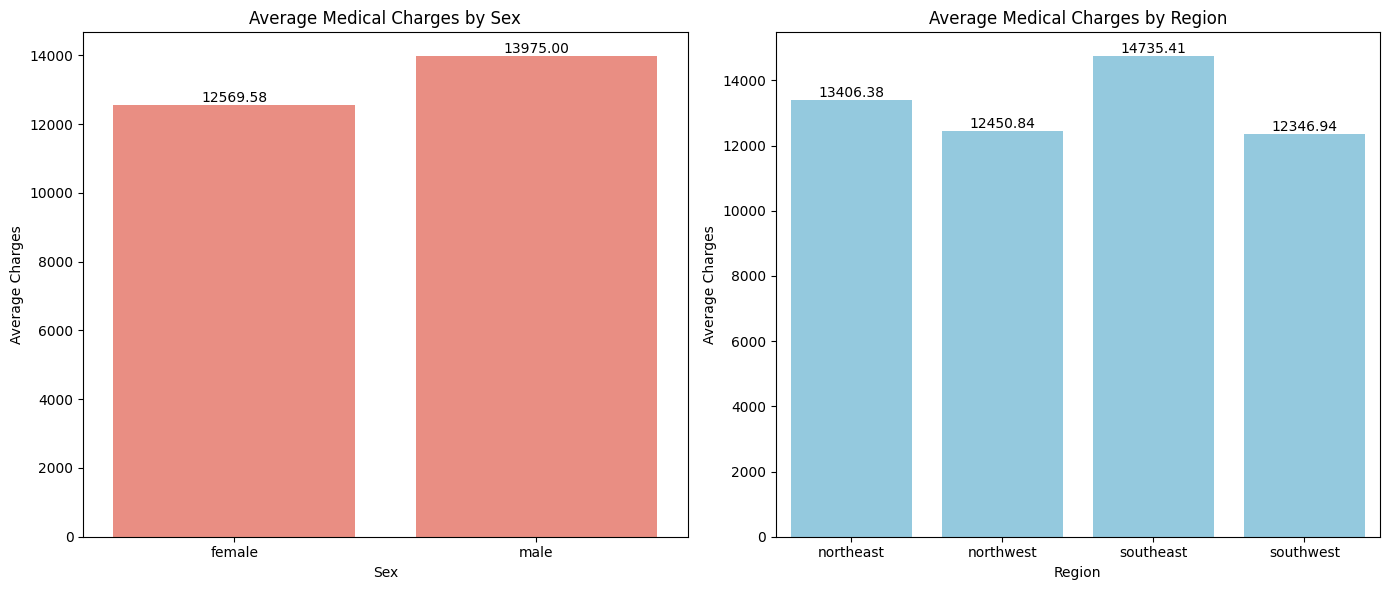

In [88]:
import seaborn as sns

## calucate the average charges based on particular feature
avg_charges_by_sex = data.groupby("sex")["charges"].mean().reset_index()
avg_charges_by_region = data.groupby("region")["charges"].mean().reset_index()

# Create subplots: 1 row, 2 columns to accommodate the two remaining plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjusted figsize for 1x2 layout

# Line plot for average charges by sex (left plot)
# Now accessed directly as axes[0] in a single-row subplot
sns.barplot(ax=axes[0], x='sex', y='charges', data=avg_charges_by_sex, color='salmon')
axes[0].set_title('Average Medical Charges by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')

# Line plot for average charges by BMI (right plot)
# Now accessed directly as axes[1] in a single-row subplot
sns.barplot(ax=axes[1], x='region', y='charges', data=avg_charges_by_region, color='skyblue')
axes[1].set_title('Average Medical Charges by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()


In [89]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


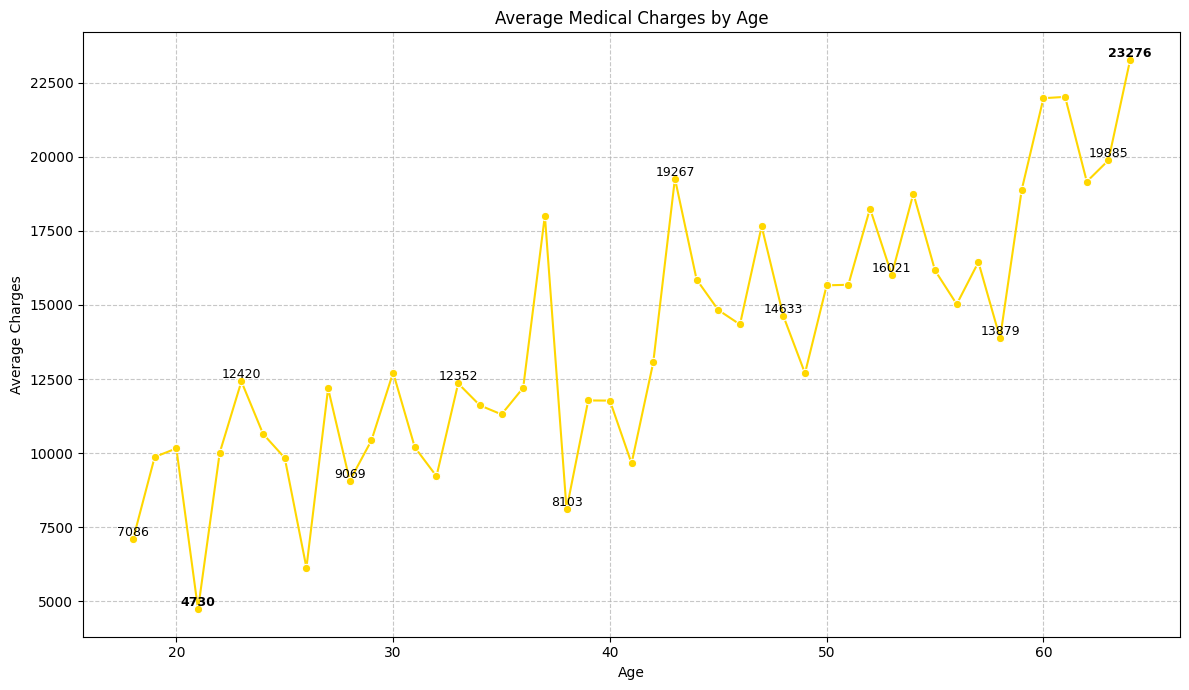

In [90]:


# Calculate the average medical charges based on age
avg_charges_by_age = data.groupby("age")["charges"].mean().reset_index()

# Create a single line plot for average medical charges by age
# We create a new figure and axes for this plot
plt.figure(figsize=(12, 7)) # Increased figure size for better label visibility
ax = sns.lineplot(x="age", y="charges", data=avg_charges_by_age, color="gold", marker='o')

# Set appropriate title and labels for the plot using the 'ax' object
ax.set_title('Average Medical Charges by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Average Charges')

# Find the index of min and max charges for special labeling
min_charge_idx = avg_charges_by_age['charges'].idxmin()
max_charge_idx = avg_charges_by_age['charges'].idxmax()

# Add value labels to a subset of data points on the line plot
# Iterate through the rows of the DataFrame used for plotting
for index, row in avg_charges_by_age.iterrows():
    # Label every 5th point, or the min/max charge points
    if index % 5 == 0 or index == min_charge_idx or index == max_charge_idx:
        ax.text(
            row['age'],             # X-coordinate for the label (age)
            row['charges'],          # Y-coordinate for the label (average charges)
            f'{row["charges"]:.0f}', # Text to display (formatted to 0 decimal places)
            ha='center',             # Horizontal alignment: center the text on the point
            va='bottom',             # Vertical alignment: place text slightly above the point
            fontsize=9,              # Font size for the label
            color='black',           # Color of the label text
            weight='bold' if index == min_charge_idx or index == max_charge_idx else 'normal' # Bold for min/max
        )

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [91]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


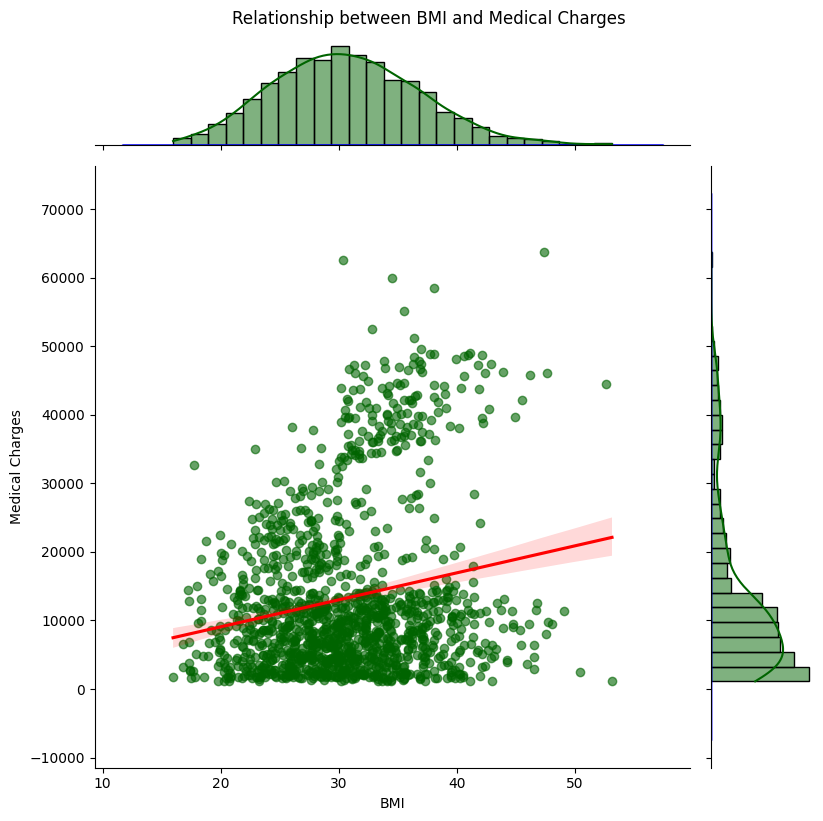

In [92]:

# Calculate the average medical charges based on age
avg_charges_by_bmi = data.groupby("bmi")["charges"].mean().reset_index()


# Using sns.jointplot for a comprehensive view of BMI vs. Charges
# kind='reg' adds a regression line and confidence interval
# kind='kde' would show contour plots of the joint density
# kind='hex' would show a hexagonal binning plot for dense data
# kind='hist' would show 2D histogram
g = sns.jointplot(x="bmi", y="charges", data=data, kind='reg', height=8, color='darkgreen',
                  scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# You can also add a KDE plot to the marginals for smoother distribution curves
g.plot_marginals(sns.kdeplot, color='blue', fill=True, alpha=0.3)

# Set titles and labels
g.fig.suptitle('Relationship between BMI and Medical Charges', y=1.02) # Adjust y to prevent overlap
g.set_axis_labels('BMI', 'Medical Charges')

# Display the plot
plt.show()

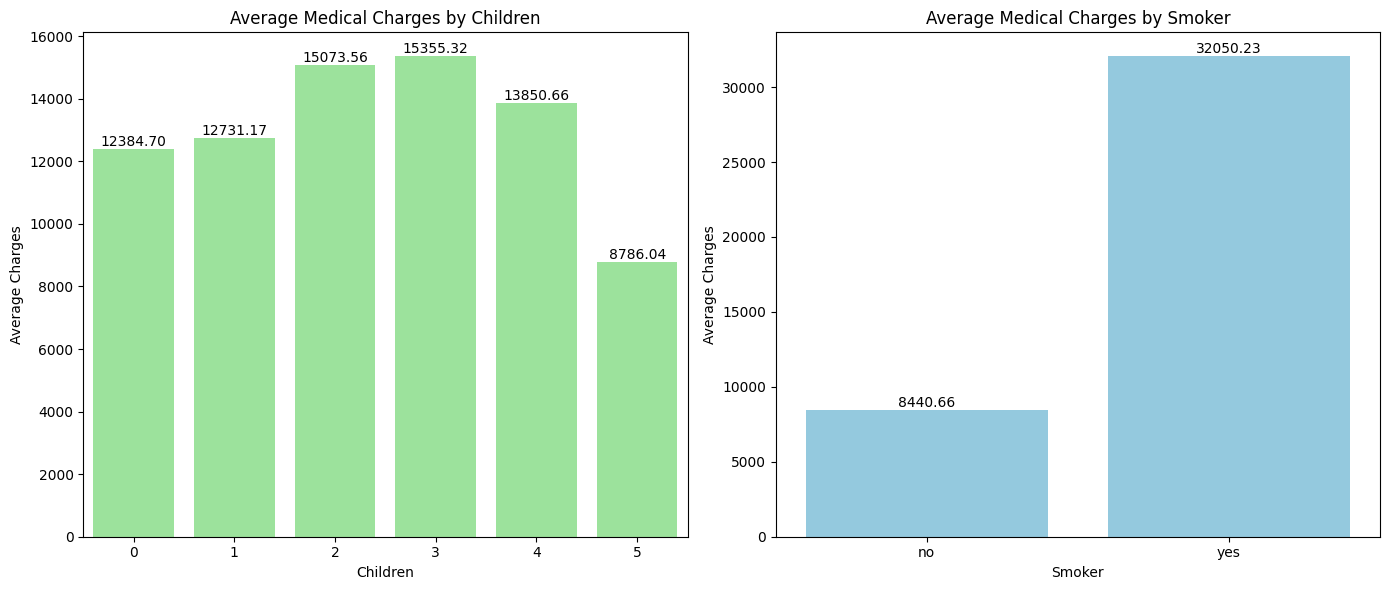

In [93]:
import seaborn as sns

## calucate the average charges based on particular feature
avg_charges_by_children = data.groupby("children")["charges"].mean().reset_index()
avg_charges_by_smoker = data.groupby("smoker")["charges"].mean().reset_index()

# Create subplots: 1 row, 2 columns to accommodate the two remaining plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjusted figsize for 1x2 layout

# Line plot for average charges by sex (left plot)
# Now accessed directly as axes[0] in a single-row subplot
sns.barplot(ax=axes[0], x='children', y='charges', data=avg_charges_by_children, color='lightgreen')
axes[0].set_title('Average Medical Charges by Children')
axes[0].set_xlabel('Children')
axes[0].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')

# Line plot for average charges by BMI (right plot)
# Now accessed directly as axes[1] in a single-row subplot
sns.barplot(ax=axes[1], x='smoker', y='charges', data=avg_charges_by_smoker, color='skyblue')
axes[1].set_title('Average Medical Charges by Smoker')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [95]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Feature Extraction

In [96]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [97]:
## Categorical Features
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_features

['sex', 'smoker', 'region']

In [98]:
## Numerical Features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_features

['age', 'bmi', 'children', 'charges']

In [99]:
## discrete feature
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25]
discrete_feature

['children']

In [100]:
## continuous feature
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
continuous_feature

['age', 'bmi', 'charges']

In [101]:
for col in data.columns:
  print(f"Column Name: {col}, Data Type: {data[col].dtype}")
  print(f"Unique Feature Count: {len(data[col].unique())}")
  print('-----------------------')

Column Name: age, Data Type: int64
Unique Feature Count: 47
-----------------------
Column Name: sex, Data Type: object
Unique Feature Count: 2
-----------------------
Column Name: bmi, Data Type: float64
Unique Feature Count: 548
-----------------------
Column Name: children, Data Type: int64
Unique Feature Count: 6
-----------------------
Column Name: smoker, Data Type: object
Unique Feature Count: 2
-----------------------
Column Name: region, Data Type: object
Unique Feature Count: 4
-----------------------
Column Name: charges, Data Type: float64
Unique Feature Count: 1337
-----------------------


In [102]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Independent Feature and Dependent Feature

In [103]:
## Independent Feature
X = data.drop(['charges'],axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [104]:
## dependent feature
y = data['charges']
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
y_train.shape,y_test.shape

((1069,), (268,))

In [106]:
## Create Column Transformer with 3 types of transformer i.e. StandardScaler() , OneHotEncoder(), ColumnTransformer()
### numerical feature from independent features
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

In [107]:
num_features

Index(['age', 'bmi', 'children'], dtype='object')

In [108]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [109]:
## transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_encoder = OneHotEncoder(drop='first')
std_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_encoder,cat_features),
        ("StandardScaler",std_scaler,num_features)
    ]
)

In [110]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['sex', 'smoker', 'region'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object'))])

In [111]:

## applying the transformation to the training dataset (fit_transform)
# Fit the preprocessor ONLY on the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the *fitted* preprocessor (do NOT fit again!)
X_test_transformed = preprocessor.transform(X_test)

In [112]:
temp_df=pd.DataFrame(X_train_transformed)

In [113]:
X_train_transformed

array([[ 1.        ,  0.        ,  0.        , ..., -1.1576804 ,
        -0.99692768, -0.90790804],
       [ 1.        ,  0.        ,  0.        , ..., -1.30061876,
        -0.79276204,  0.7669042 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.91492586,
         1.15466402,  0.7669042 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.37208794,
        -1.4118716 , -0.07050192],
       [ 0.        ,  0.        ,  0.        , ..., -0.08564268,
        -0.41997378,  1.60431032],
       [ 0.        ,  0.        ,  0.        , ..., -0.30005022,
         0.87941237,  0.7669042 ]])

In [114]:
temp_df.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.083715,0.013768,0.001430,-0.023158,-0.029171,0.041285,-0.000478
1,0.083715,1.000000,-0.053395,0.076735,-0.038168,-0.039003,-0.020246,0.017586
2,0.013768,-0.053395,1.000000,-0.346930,-0.328775,-0.000210,-0.114917,0.030469
3,0.001430,0.076735,-0.346930,1.000000,-0.347802,-0.020504,0.267248,-0.023267
4,-0.023158,-0.038168,-0.328775,-0.347802,1.000000,0.015707,-0.009675,-0.009634
5,-0.029171,-0.039003,-0.000210,-0.020504,0.015707,1.000000,0.122327,0.057170
6,0.041285,-0.020246,-0.114917,0.267248,-0.009675,0.122327,1.000000,0.002376
7,-0.000478,0.017586,0.030469,-0.023267,-0.009634,0.057170,0.002376,1.000000


<Axes: >

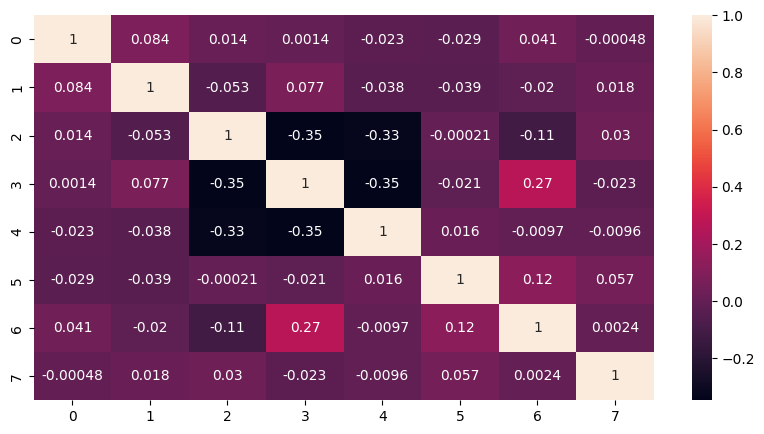

In [115]:

plt.figure(figsize=(10,5))
sns.heatmap(temp_df.corr(),annot=True)

## Model Training
### Model Evaluation

In [116]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,recall_score,precision_score


In [117]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [118]:
## create dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Kneighbor Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()

}

In [119]:
all_model_accuracies = {} # Dictionary to store model names and all test R2 scores

## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2= evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2= evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    # Store both train and test R2 scores (converted to percentage)
    all_model_accuracies[list(models.keys())[i]] = {
        'test_accuracy': model_test_r2 * 100,
        'train_accuracy': model_train_r2 * 100
    }

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6081.1069
- Mean Absolute Error: 4181.9015
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5956.3429
- Mean Absolute Error: 4177.0456
- R2 Score: 0.8069


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 6081.3521
- Mean Absolute Error: 4190.3632
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5971.8617
- Mean Absolute Error: 4193.8919
- R2 Score: 0.8059


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 6081.1125
- Mean Absolute Error: 4182.0846
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.6141
- Mean Absolute Error: 4177.7809
- R2 Score: 0.8068


Kneighbor Regressor
Model performance for Training set
- Root Mean Squared Error: 5293.8394
- Mean Absolu

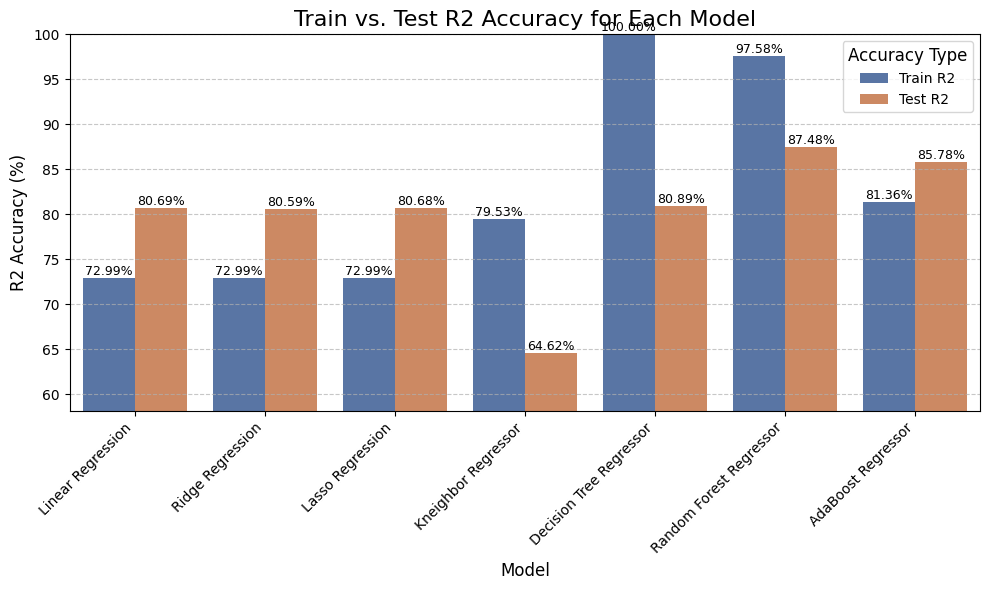

In [120]:
# Prepare data for seaborn
# We need a long-form DataFrame for seaborn's `barplot` with `hue`
plot_data = []
for model_name, accuracies in all_model_accuracies.items():
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Train R2', 'R2 Accuracy (%)': accuracies['train_accuracy']})
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Test R2', 'R2 Accuracy (%)': accuracies['test_accuracy']})

df_plot = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 6)) # Adjust figure size as needed

sns.barplot(
    x='Model',
    y='R2 Accuracy (%)',
    hue='Accuracy Type', # This creates the grouped bars
    data=df_plot,
    palette='deep', # You can choose another palette like 'viridis', 'pastel', 'rocket'
    errorbar=None # To remove error bars if present (default is `se` for standard error)
)

# Add R2 values on top of the bars
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Accuracy (%)', fontsize=12)
plt.title('Train vs. Test R2 Accuracy for Each Model', fontsize=16)

# Adjust y-axis limits to start from 0 or a sensible value if all accuracies are very high
min_overall_r2 = min(df_plot['R2 Accuracy (%)']) if not df_plot.empty else 0
plt.ylim(max(0, min_overall_r2 * 0.9), 100) # Ensure y-axis starts reasonably

plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.legend(title='Accuracy Type', fontsize=10, title_fontsize=12) # Add a legend
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [121]:
## Hyper parameter tunning
### RandomizedCV
#Initialize few parameter for Hyperparamter tuning
dt_params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30], # 'None' means unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    # 'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2', 0.8, 0.5], # 0.8 means 80% of features
    # 'max_leaf_nodes': [None, 10, 20, 30, 50],
    # 'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.05, 0.1,0.0005]
}

rf_params={
    'n_estimators': [100, 200, 300, 500], # Number of trees in the forest
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30], # None means unlimited depth
    'min_samples_split': [2, 5, 10],
    'max_features': [1.0, 'sqrt', 'log2', 0.8], # For Random Forest, 'sqrt' (or 0.33) is often a good default
    # 'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
    # 'oob_score': [False], # Usually set to True if you want to use OOB samples to estimate the generalization accuracy
    # 'ccp_alpha': [0.0, 0.001, 0.01], # Cost-Complexity Pruning
    # 'max_samples': [None, 0.7, 0.9], # If bootstrap=True, this sets the fraction of samples to draw. Not always tuned initially.
    # 'max_leaf_nodes': [None, 20, 50], # Less common to tune heavily if max_depth is tuned.
    # 'min_impurity_decrease': [0.0, 0.01], # Less common to tune heavily if others are used for regularization.
}

adb_params={
    'n_estimators': [50, 100, 200, 300, 500], # Number of boosting stages (weak learners)
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0], # Shrinks the contribution of each estimator
    'loss': ['linear', 'square', 'exponential'], # Type of loss function to use
    # 'estimator': [ # The base estimator. Often a DecisionTreeRegressor.
    #     # Define base estimators with various depths. Shallow trees are common for AdaBoost.
    #     DecisionTreeRegressor(max_depth=1), # Very common: "stumps"
    #     DecisionTreeRegressor(max_depth=2),
    #     DecisionTreeRegressor(max_depth=3),
    #     # You could also try other simple models here, but Decision Trees are standard.
    # ],
}

In [122]:

# Models list for Hyperparameter tuning
randomcv_models=[
    ("Decision Tree",DecisionTreeRegressor(),dt_params),
    ("Random Forest",RandomForestRegressor(),rf_params),
    ("Ada Boost",AdaBoostRegressor(),adb_params)
]

In [123]:
### Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        n_jobs=-1,
        verbose = 1,
    )
    random.fit(X_train_transformed,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------------Best Paramters for {model_name}-----------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 75 candidates, totalling 225 fits
-------------------Best Paramters for Decision Tree-----------------------------
{'splitter': 'best', 'min_samples_split': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'squared_error', 'ccp_alpha': 0.0}
-------------------Best Paramters for Random Forest-----------------------------
{'n_estimators': 100, 'min_samples_split': 10, 'max_features': 0.8, 'max_depth': 30, 'criterion': 'absolute_error'}
-------------------Best Paramters for Ada Boost-----------------------------
{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.01}


In [131]:
## create dictionary of models
models = {
    "Decision Tree Regressor":DecisionTreeRegressor(splitter = 'best',
                                                    min_samples_split = 2,
                                                    max_features = None,
                                                    max_depth = 5,
                                                    criterion = 'squared_error',
                                                    ccp_alpha = 0.001),
    "Random Forest Regressor":RandomForestRegressor(
                                                    n_estimators = 100,
                                                    min_samples_split = 10,
                                                    max_features = 0.8,
                                                    max_depth = 30,
                                                    criterion = 'absolute_error',
                                                   ),
    "AdaBoost Regressor": AdaBoostRegressor(
        n_estimators = 50, loss  = 'exponential', learning_rate = 0.01
    )
}

all_model_tuned_accuracies = {} # Dictionary to store model names and all test R2 scores


## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    # Store both train and test R2 scores (converted to percentage)
    all_model_tuned_accuracies[list(models.keys())[i]] = {
        'tuned_test_accuracy': model_test_r2 * 100,
        'tuned_train_accuracy': model_train_r2 * 100
    }

    print('='*35)
    print('\n')

Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 4269.3731
- Mean Absolute Error: 2397.1220
- R2 Score: 0.8669
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4411.5376
- Mean Absolute Error: 2656.8391
- R2 Score: 0.8941


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 3683.6662
- Mean Absolute Error: 1610.1809
- R2 Score: 0.9009
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4369.1141
- Mean Absolute Error: 2173.2047
- R2 Score: 0.8961


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 4537.7099
- Mean Absolute Error: 2820.2761
- R2 Score: 0.8496
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4469.7368
- Mean Absolute Error: 2920.2793
- R2 Score: 0.8913




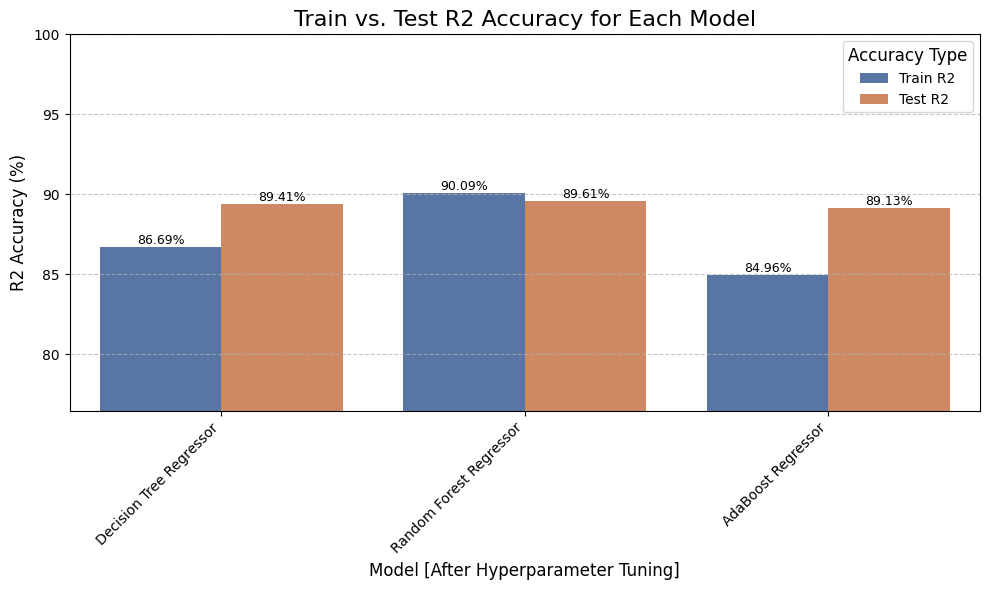

In [132]:
# Prepare data for seaborn
# We need a long-form DataFrame for seaborn's `barplot` with `hue`
plot_data = []
for model_name, accuracies in all_model_tuned_accuracies.items():
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Train R2', 'R2 Accuracy (%)': accuracies['tuned_train_accuracy']})
  plot_data.append({'Model': model_name, 'Accuracy Type': 'Test R2', 'R2 Accuracy (%)': accuracies['tuned_test_accuracy']})

df_plot = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 6)) # Adjust figure size as needed

sns.barplot(
    x='Model',
    y='R2 Accuracy (%)',
    hue='Accuracy Type', # This creates the grouped bars
    data=df_plot,
    palette='deep', # You can choose another palette like 'viridis', 'pastel', 'rocket'
    errorbar=None # To remove error bars if present (default is `se` for standard error)
)

# Add R2 values on top of the bars
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.xlabel('Model [After Hyperparameter Tuning]', fontsize=12)
plt.ylabel('R2 Accuracy (%)', fontsize=12)
plt.title('Train vs. Test R2 Accuracy for Each Model', fontsize=16)

# Adjust y-axis limits to start from 0 or a sensible value if all accuracies are very high
min_overall_r2 = min(df_plot['R2 Accuracy (%)']) if not df_plot.empty else 0
plt.ylim(max(0, min_overall_r2 * 0.9), 100) # Ensure y-axis starts reasonably

plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.legend(title='Accuracy Type', fontsize=10, title_fontsize=12) # Add a legend
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Sample Data to predict the medical charges

In [133]:
# sample_new_data = {
#     'age': [19],
#     'sex': ['female'],
#     'bmi': [27.900],
#     'children': [0],
#     'smoker': ['yes'],
#     'region': ['southwest']
# }
#charges should be 16884.92400


sample_new_data = {
    'age': [33],
    'sex': ['male'],
    'bmi': [22.705],
    'children': [3],
    'smoker': ['yes'],
    'region': ['northwest']
}
#33	male	22.705	0	no	northwest -->21984.47061


# sample_new_data = {
#     'age': [28],
#     'sex': ['male'],
#     'bmi': [33.000],
#     'children': [3],
#     'smoker': ['no'],
#     'region': ['southeast']
# }
## 28	male	33.000	3	no	southeast  -->4449.46200

# Create a DataFrame from this data
new_patient_df = pd.DataFrame(sample_new_data)

print(new_patient_df)

   age   sex     bmi  children smoker     region
0   33  male  22.705         3    yes  northwest


In [134]:
# Assuming 'preprocessor' is your fitted ColumnTransformer
new_patient_transformed = preprocessor.transform(new_patient_df)

In [135]:
new_patient_transformed

array([[ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        -0.44298858, -1.2953236 ,  1.60431032]])

In [136]:
## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    # Assuming 'model' is your trained best estimator
    predicted_charge = model.predict(new_patient_transformed)
    print(list(models.keys())[i])

    print(f"The predicted medical charge for this patient is: ${predicted_charge[0]:,.2f}")
    print('='*35)
    print('\n')

Decision Tree Regressor
The predicted medical charge for this patient is: $17,344.46


Random Forest Regressor
The predicted medical charge for this patient is: $18,402.01


AdaBoost Regressor
The predicted medical charge for this patient is: $18,489.24




In [137]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
